<div class="alert alert-block alert-success">
    <h1 align="center">Training a Model to Predict the Motion of a Projectile</h1>
    <h3 align="center">Mahan Sattarpour</h3>
</div>

### Import libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [2]:
projectile = pd.read_csv('Projectile.csv')
projectile.drop([0],inplace=True)
projectile

,Time,Initial Velocity,Sine of Theta,Cosine of Theta,X Position,Y Position
1,0.01,19.786574,0.994001,-0.109371,-0.021641,0.196189
2,0.02,19.786574,0.994001,-0.109371,-0.043282,0.391397
3,0.03,19.786574,0.994001,-0.109371,-0.064922,0.585626
4,0.04,19.786574,0.994001,-0.109371,-0.086563,0.778875
5,0.05,19.786574,0.994001,-0.109371,-0.108204,0.971144
...,...,...,...,...,...,...
34847,4.91,39.965679,0.607885,0.794025,155.812729,1.156469
34848,4.92,39.965679,0.607885,0.794025,156.130067,0.917744
34849,4.93,39.965679,0.607885,0.794025,156.447404,0.678040
34850,4.94,39.965679,0.607885,0.794025,156.764742,0.437355


In [3]:
X = projectile.drop(['X Position','Y Position'],axis=1)
y = projectile[['X Position','Y Position']]
sc = StandardScaler()
X_scale = sc.fit_transform(X)

In [4]:
projectile_test = pd.read_csv('Projectile_test.csv')
X_a = projectile_test.drop(['X Position','Y Position'],axis=1)
y_a = projectile_test[['X Position','Y Position']]
X_ascale = sc.transform(X_a)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 1)

### Linear Regression

In [6]:
slr = LinearRegression()
accuracies = cross_val_score(estimator = slr, X = X_train, y = y_train, cv = 10)
print('Best R^2 :',accuracies.mean())
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
print('R^2:',metrics.r2_score(y_train, y_train_pred))

Best R^2 : 0.5196163620947487
R^2: 0.5202362862722889


### Polynomial Regression

In [7]:
poly_features = PolynomialFeatures(degree=3)
   

X_train_quadratic = poly_features.fit_transform(X_train)
   

quadratic = LinearRegression()

quadratic.fit(X_train_quadratic, y_train)
accuracies = cross_val_score(estimator = quadratic, X = X_train_quadratic, y = y_train, cv = 10)
print('Best R^2:',accuracies.mean())
y_train_predicted_quad = quadratic.predict(X_train_quadratic)
y_test_predicted = quadratic.predict(poly_features.fit_transform(X_test))
print('R^2:',metrics.r2_score(y_train, y_train_predicted_quad))
print('R^2:',metrics.r2_score(y_test, y_test_predicted))

Best R^2: 1.0
R^2: 1.0
R^2: 1.0


In [8]:
y_preda = quadratic.predict(poly_features.fit_transform(X_ascale))
print('R^2:',metrics.r2_score(y_preda, y_a))

R^2: 1.0


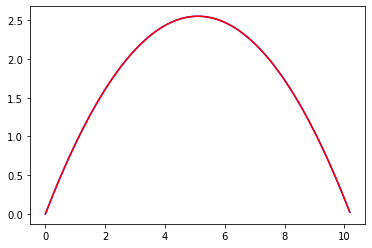

In [9]:
plt.plot(np.array(y_a['X Position']),np.array(y_a['Y Position']),color='blue')
plt.plot(y_preda[:,0],y_preda[:,1],color='red')

### Defining a function for this problem

In [10]:
def my_function(Projectile):
    projectile = pd.read_csv(Projectile + '.csv')
    projectile.drop([0],inplace=True)
    X = projectile.drop(['X Position','Y Position'],axis=1)
    y = projectile[['X Position','Y Position']]
    sc = StandardScaler()
    X_scale = sc.fit_transform(X)
    projectile_test = pd.read_csv('Projectile_test.csv')
    X_a = projectile_test.drop(['X Position','Y Position'],axis=1)
    y_a = projectile_test[['X Position','Y Position']]
    X_ascale = sc.transform(X_a)
    X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 1)
    poly_features = PolynomialFeatures(degree=3)
    X_train_quadratic = poly_features.fit_transform(X_train) 
    quadratic = LinearRegression()
    quadratic.fit(X_train_quadratic, y_train)
    accuracies = cross_val_score(estimator = quadratic, X = X_train_quadratic, y = y_train, cv = 10)
    print('Best R^2:',accuracies.mean())
    y_train_predicted_quad = quadratic.predict(X_train_quadratic)
    y_test_predicted = quadratic.predict(poly_features.fit_transform(X_test))
    print('R^2:',metrics.r2_score(y_train, y_train_predicted_quad))
    print('R^2:',metrics.r2_score(y_test, y_test_predicted))
    y_preda = quadratic.predict(poly_features.fit_transform(X_ascale))
    print('R^2:',metrics.r2_score(y_preda, y_a))
    plt.plot(np.array(y_a['X Position']),np.array(y_a['Y Position']),color='blue')
    plt.plot(y_preda[:,0],y_preda[:,1],color='red')

Best R^2: 1.0
R^2: 1.0
R^2: 1.0
R^2: 1.0


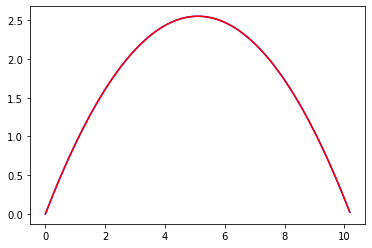

In [11]:
my_function('Projectile2')

Best R^2: 1.0
R^2: 1.0
R^2: 1.0
R^2: -1586.940264261274


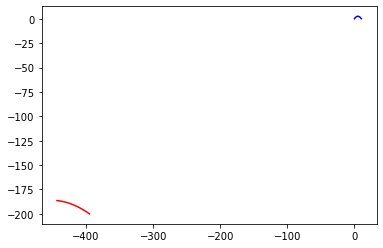

In [12]:
my_function('Projectile3')